![Open CV](notebook_diagrams/opencv.png)

# Tutorial for OpenCV
OpenCV is a library for processing images with computer vision algorithms.  Like pandas and numpy, it is extremely important for machine learning, particularly for computer vision.  OpenCV is written primariily in C++, but there are Python wrappers for it that enable for the code to be processed as though it were written in C++.

All the OpenCV array structures are converted to-and-from Numpy arrays. So whatever operations you can do in Numpy, you can combine it with OpenCV.  This makes OpenCV and Numpy extremely useful when used together.  Typically, **OpenCV** is used for loading/saving images, as well as for complex image manipulation (such as detecting objects in images), while **Numpy** is more often used for matrix-like image manipulations, such as rotating or cropping an image. 

In this tutorial, we'll explore the basic functionalities of OpenCV, and how they can be used in computer vision. 

A reference to this documentation can be found [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_setup/py_intro/py_intro.html#intro).

## Import Block
Typically you will see `import cv2 as cv` written, but this is just convention.  You can write this import statement in whatever way works best for you.

In [2]:
# We will also be using opencv, an image processing library
! pip install opencv-python
import cv2 as cv

# Import NumPy
import numpy as np 

# We will use os to find specific paths in our directories
import os

# Use for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# Used for OCR
import math
from scipy import ndimage
!pip install pytesseract
import pytesseract

## Loading Images from OpenCV
OpenCV has efficient and compact functionality built-in for loading images.  **NOTE**: OpenCV loads images in BGR format, rather than RGB.  We can use code below to make sure we load images in RGB format.

In [3]:
# Import image
img_fname = os.path.join("notebook_diagrams","puppy.png")

# Now let's load the image into a numpy array using opencv!
A_BGR = cv.imread(img_fname)
A_RGB = cv.cvtColor(A_BGR, cv.COLOR_BGR2RGB)

print("Data type of loaded image is %s" % (type(A_BGR)))

Data type of loaded image is <class 'numpy.ndarray'>


We can see that after we load the image using **OpenCV**, the image is stored as a Numpy array!  This means we can use all of Numpy's vector, matrix, linear algebra, and mathematical functions that are extremely relevant for many computer vision and image pre-processing tasks.

## Plotting Loaded Images using Matplotlib
After loading our images, we can also visualize what they look like using matplotlib's `imread` function.

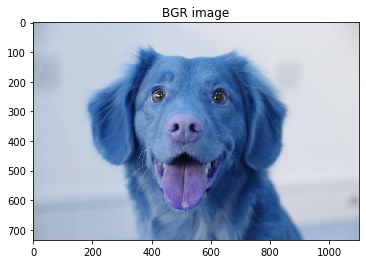

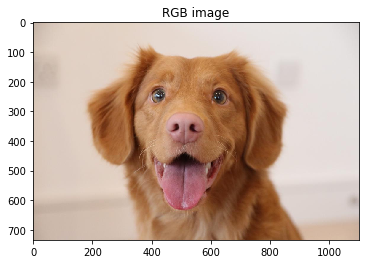

<Figure size 432x288 with 0 Axes>

In [4]:
# Plot the BGR image
plt.imshow(A_BGR)
plt.title("BGR image")
plt.show()
plt.clf()

# Plot the RGB image
plt.imshow(A_RGB)
plt.title("RGB image")
plt.show()
plt.clf()

## Combining Numpy and OpenCV: Color Segmentation
Now that we've seen one way in which we can use numpy and OpenCV together, we can use the two libraries together to perform more complex operations on imagery.  One of these operations is known as color segmentation, which we will explore below.

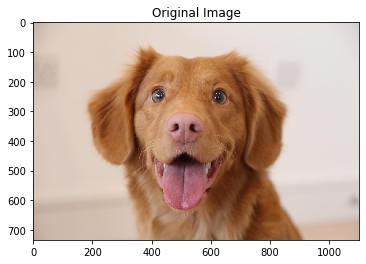

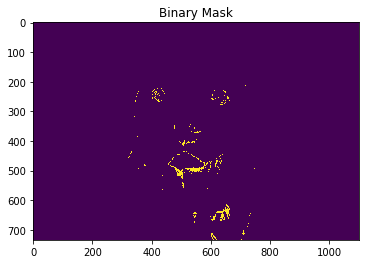

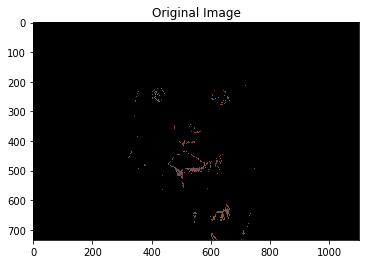

<Figure size 432x288 with 0 Axes>

In [5]:
# Remember A_RGB is our image
IMG = A_RGB

# Specify upper and lower bands
LOWER_BAND = [110,50,50]
UPPER_BAND = [130,255,255]

# define range of blue color in HSV
lower_blue = np.array(LOWER_BAND)
upper_blue = np.array(UPPER_BAND)

# Threshold the HSV image to get only blue colors
mask = cv.inRange(IMG, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(IMG, IMG, mask= mask)

# Plot original
plt.imshow(IMG)
plt.title("Original Image")
plt.show()
plt.clf()

# Plot mask
plt.imshow(mask)
plt.title("Binary Mask")
plt.show()
plt.clf()

# Plot result
plt.imshow(res)
plt.title("Original Image")
plt.show()
plt.clf()


## Processing Image Data with Numpy and OpenCV
As discussed in the numpy tutorial, another aspect of numpy that makes it really important for machine learning and computer vision is its ability to process and transform large matrices and tensors (matrices of any generalized size).  We'll go through a simple example here with loading and processing an image, but we will see in future lectures and tutorials that numpy plays a crucial role in the computer vision pipeline.


In [6]:
# Image path
img_fpath = os.path.join("notebook_diagrams", "numpy_example.png")

# Load image
A = cv.imread(img_fpath)

# Change channels from BGR --> RGB
A = cv.cvtColor(A, cv.COLOR_BGR2RGB)

# Let's print some characteristics about our image array, A
print("Type of A: %s" % (type(A)))
print("Shape of Image: {}".format(A.shape))


Type of A: <class 'numpy.ndarray'>
Shape of Image: (300, 452, 3)


##### Now Plot the Image
We'll do this through the **matplotlib** library, which is used primarily for plotting.

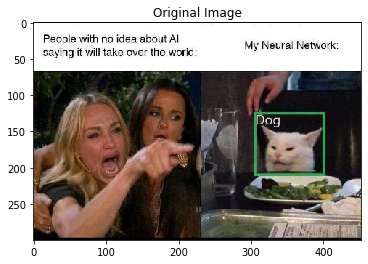

In [7]:
# Show the image
plt.imshow(A)
plt.title("Original Image")
plt.show()

##### Now Let's Crop the Image
We can do this through **numpy**. 

Shape of cat-dog: (125, 125, 3)


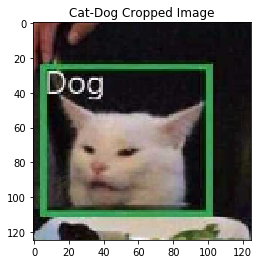

In [8]:
# Now crop image
cat_dog = A[100:225,300:425]
print("Shape of cat-dog: {}".format(cat_dog.shape))
plt.imshow(cat_dog)
plt.title("Cat-Dog Cropped Image")
plt.show()

#### Downsampling
Next, we will downsample our image down to a smaller size.  This is especially useful if we want to resize our images down to a smaller size, or if we want to reduce the computational complexity of neural networks.  We will write a function that downsamples an image array given by **A** by a factor of **n**.

When downsampling, we will first use a Gaussian blur kernel, apply it to the image, and then downsample the blurred image.  We can apply the blurring kernel using [OpenCV's Gaussian Blur kernel](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html).

In [9]:
# A denotes image array, n denotes the downsampling factor, and k denotes the kernel size
def downsample(A, n, k=5):
    
    # Blur the image
    blurred_A = cv.GaussianBlur(A,(k,k),0)
    
    # Downsample the blurred image
    downsampled = blurred_A[::n, ::n, ::]
    
    return downsampled    

##### Downsample the Blurred Image
Now we can use our function above to downsample our cat image!  We'll do this by a factor of two and four.

Shape of cat-dog downsampled 2x: (63, 63, 3)


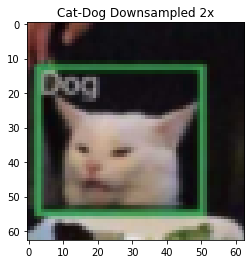

Shape of cat-dog downsampled 4x: (32, 32, 3)


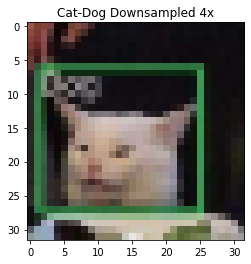

In [10]:
# Now downsample cat-dog - 2x
cat_dog_downsampled_2x = downsample(cat_dog, 2)
print("Shape of cat-dog downsampled 2x: {}".format(cat_dog_downsampled_2x.shape))
plt.imshow(cat_dog_downsampled_2x)
plt.title("Cat-Dog Downsampled 2x")
plt.show()

# 4x
cat_dog_downsampled_4x = downsample(cat_dog, 4)
print("Shape of cat-dog downsampled 4x: {}".format(cat_dog_downsampled_4x.shape))
plt.imshow(cat_dog_downsampled_4x)
plt.title("Cat-Dog Downsampled 4x")
plt.show()

## Real-World Example: OCR (Optical Character Recognition)
We can now use OpenCV and a library called pytesseract to predict characters directly from an image.  We'll define some functions below for importing our image, and then we can directly use OCR!

![OCR](notebook_diagrams/OCR.png)

The reference for this exercise can be found [here](https://medium.com/analytics-vidhya/ocr-on-region-of-interest-roi-in-image-using-opencv-and-tesseract-a7cab6ff18b3).

### Specify Image Path and Load Image
Let's see what the image we'll be reading for OCR looks like!

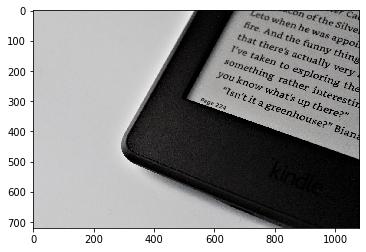

<Figure size 432x288 with 0 Axes>

In [11]:
IMAGE_FILE_LOCATION = "notebook_diagrams/OCR_example.jpeg" # Photo by Amanda Jones on Unsplash
input_img = cv.imread(IMAGE_FILE_LOCATION) # image read
plt.imshow(input_img)
plt.show()
plt.clf()

### Function for Orientation Adjustment
This function uses OpenCV to adjust the orientation of the image to make sure it's readable for our OCR program.

In [12]:
import cv2 as cv2

def orientation_correction(img, save_image = False):
    # GrayScale Conversion for the Canny Algorithm  
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # Canny Algorithm for edge detection was developed by John F. Canny not Kennedy!! :)
    img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
    # Using Houghlines to detect lines
    lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
    
    # Finding angle of lines in polar coordinates
    angles = []
    for x1, y1, x2, y2 in lines[0]:
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        angles.append(angle)
    
    # Getting the median angle
    median_angle = np.median(angles)
    
    # Rotating the image with this median angle
    img_rotated = ndimage.rotate(img, median_angle)
    
    if save_image:
        cv2.imwrite('orientation_corrected.jpg', img_rotated)
    return img_rotated

img_rotated = orientation_correction(input_img)

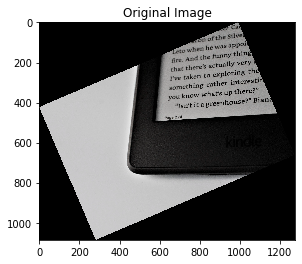

In [13]:
# load the image, clone it, and setup the mouse callback function 
image = img_rotated
image_copy = image.copy()
plt.imshow(image_copy)
plt.title("Original Image")
plt.show()

## Find Regions of Interest, Crop Image, and Apply OCR
Now we're ready to apply OCR!  We've chosen some indices for our regions of interest, but you're more than welcome to experiment with other indices as well!

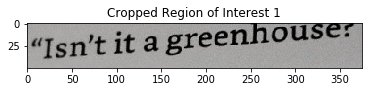

The text in the selected region is as follows: 

“Isn’t it a greenhouse:


In [14]:
# Now select coordinates for first ROI
image_roi1 = image_copy[390:440,675:1050,::]
plt.imshow(image_roi1)
plt.title("Cropped Region of Interest 1")
plt.show()

# Predict text using OCR!
text1 = pytesseract.image_to_string(image_roi1)
print("The text in the selected region is as follows: \n")
print(text1)


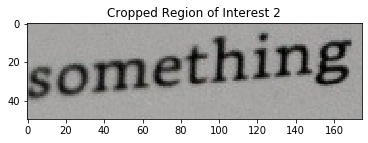

The text in the selected region is as follows: 

something


In [15]:
# Now select coordinates for second ROIs
image_roi2 = image_copy[300:350,650:825,::]
plt.imshow(image_roi2)
plt.title("Cropped Region of Interest 2")
plt.show()

# Predict text using OCR!
text2 = pytesseract.image_to_string(image_roi2)
print("The text in the selected region is as follows: \n")
print(text2)

You can adjust the indices yourself as well!  Here's a function that generalizes the above blocks of code.

In [16]:
def OCR(A, rl, rh, cl, ch):  # rl ~ row low, rh ~ row high, cl ~ column low, ch ~ column high
    try:
        roi = image_copy[rl:rh, cl:ch, ::]
        plt.imshow(roi)
        plt.title("Cropped Region of Interest")
        plt.show()

        # Predict text using OCR!
        text1 = pytesseract.image_to_string(roi)
        print("The text in the selected region is as follows: \n")
        print(text1)
    
    except IndexError:
        print("Indices are out of bounds of the image")